<a href="https://colab.research.google.com/github/Reshma-2005/ACM-TASK-RESHMA/blob/main/logistics_Regression_from_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data=pd.read_csv("https://raw.githubusercontent.com/Reshma-2005/ACM-TASK-RESHMA/refs/heads/main/csv%20files/loanfile.csv")

In [90]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
data.shape

(614, 13)

In [93]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [94]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [95]:
data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'].fillna(data['Credit_History'].mean())

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [96]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [97]:
data.shape

(614, 13)

In [98]:
data.dropna(inplace=True)

In [99]:
data.shape

(480, 13)

the no of rows reduced to 480 because we used dropna function which deletes all the rows which contains atleast one null value

<Axes: xlabel='count', ylabel='Property_Area'>

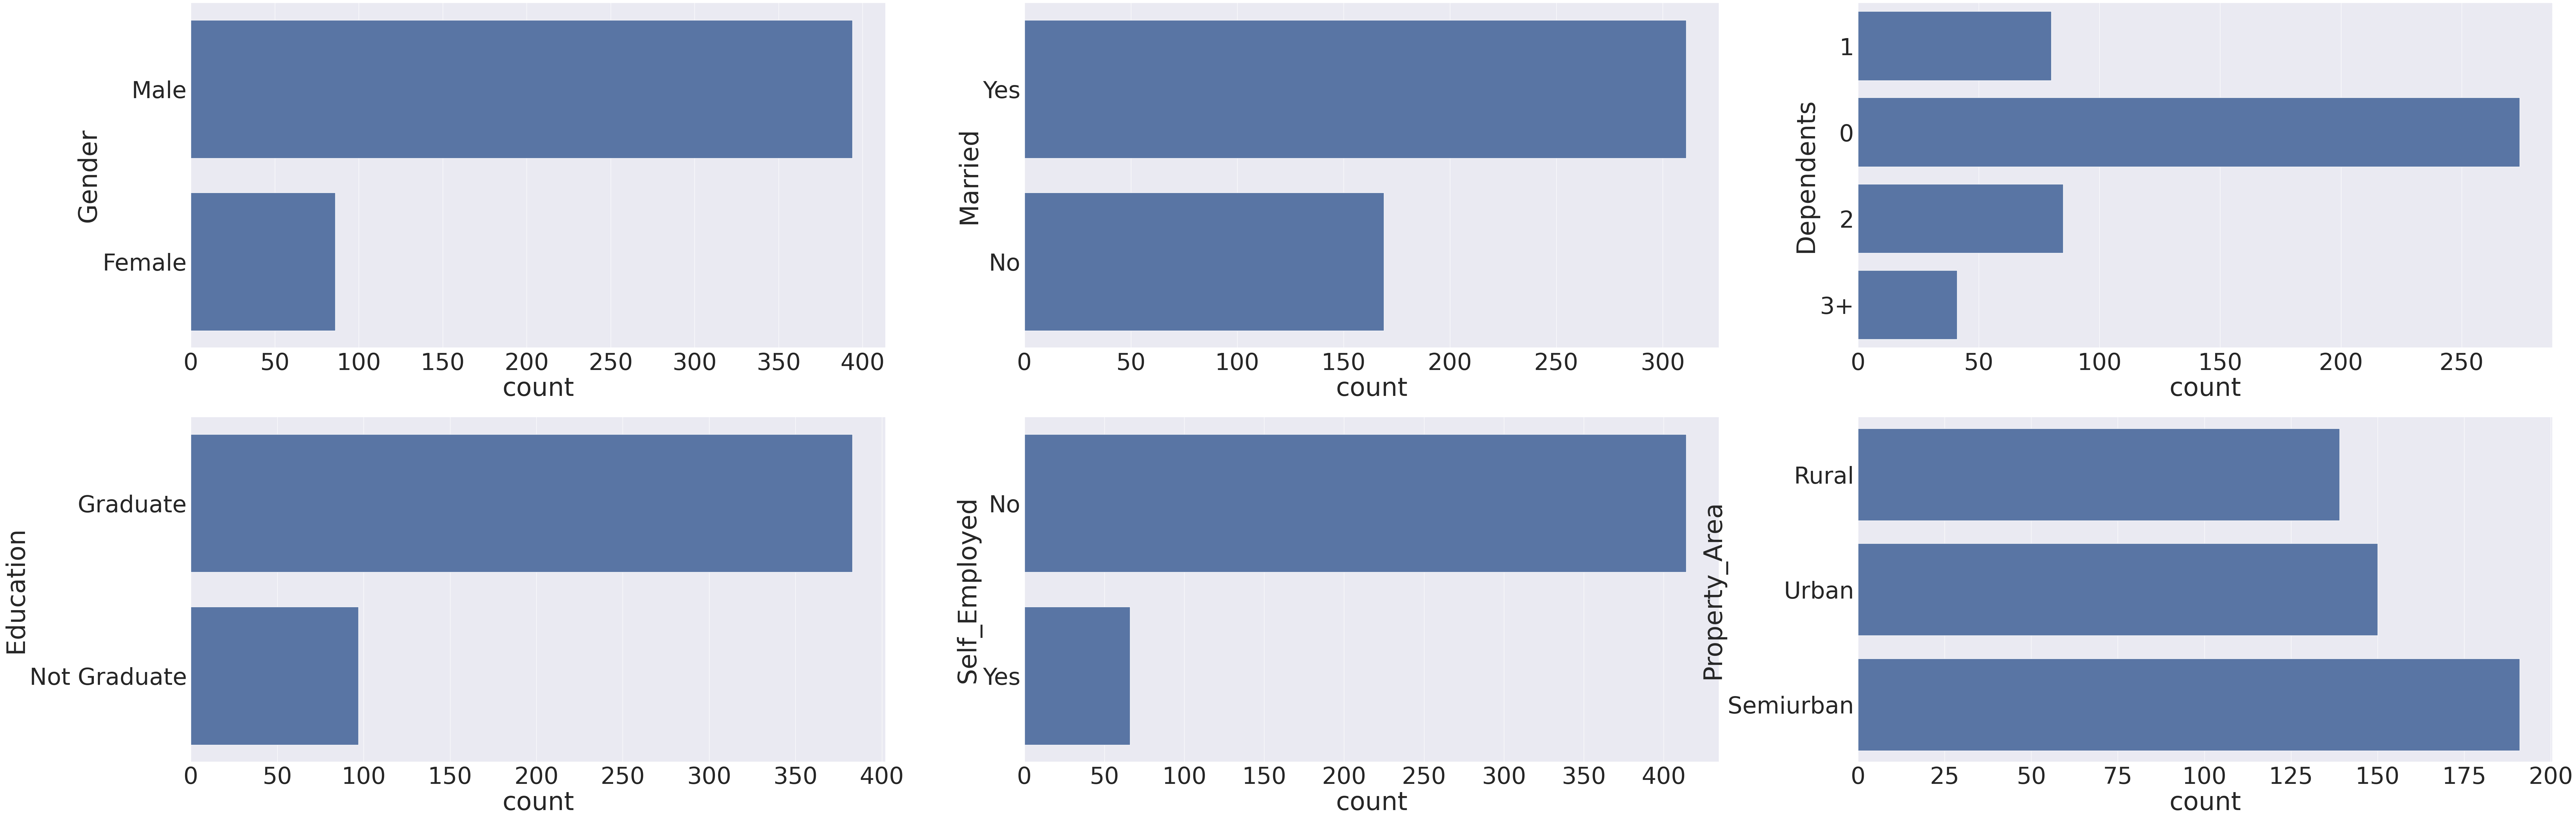

In [100]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(data['Gender'])
plt.subplot(332)
sns.countplot(data['Married'])
plt.subplot(333)
sns.countplot(data['Dependents'])
plt.subplot(334)
sns.countplot(data['Education'])
plt.subplot(335)
sns.countplot(data['Self_Employed'])
plt.subplot(336)
sns.countplot(data['Property_Area'])

In [101]:
data['Loan_Status'].replace('Y',1,inplace=True)
data['Loan_Status'].replace('N',0,inplace=True)

<ipython-input-101-d6b4b205a039>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Status'].replace('Y',1,inplace=True)
<ipython-input-101-d6b4b205a039>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [102]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
1,332
0,148


In [103]:
data.Gender=data.Gender.map({"Male":1,"Female":0})
data['Gender'].value_counts()

,count
Gender,
1,394
0,86


In [104]:
data.Married = data.Married.map({"Yes":1,"No":0})
data['Married'].value_counts()

,count
Married,
1,311
0,169


In [105]:
data.Dependents = data.Dependents.map({"0":0,"1":1,"2":2,"3+":3})
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3,41


In [106]:
data.Education = data.Education.map({"Graduate":1,"Not Graduate":0})
data['Education'].value_counts()

,count
Education,
1,383
0,97


In [107]:
data.Self_Employed = data.Self_Employed.map({"Yes":1,"No":0})
data['Self_Employed'].value_counts()

,count
Self_Employed,
0,414
1,66


In [108]:
data['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,13
100.0,13
110.0,13
187.0,12
128.0,9
...,...
280.0,1
240.0,1
214.0,1


In [109]:
data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,411
180.0,36
480.0,12
300.0,9
120.0,3
84.0,3
60.0,2
240.0,2
36.0,2


In [110]:
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,410
0.0,70


In [111]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [114]:
X=data.iloc[1:480,1:12].values
y=data.iloc[1:480,12].values

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [117]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
model=LogisticRegression()
model.fit(X_train,y_train)

lr_prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(lr_prediction,y_test))

# Assuming X and y are already defined as in your previous cells
# Identify categorical features (assuming 'Rural' is in the last column of X)

The accuracy of the Logistic Regression is 0.8208333333333333


In [120]:
print('y_predicted values =',lr_prediction)

y_predicted values = [0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [121]:
print('y_test =',y_test)

y_test = [0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1]


1 shows the the person will get loan.
0 shows the person wont get the loan.